# MNIST with Keras:

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [2]:
np.random.seed(1671)  # for reproducibility

In [3]:
# Parameters:
epoch = 20
batch_size = 128
verbose = 1
classes = 10   # number of outputs = number of digits
optimizer = RMSprop() # optimizer, explainedin this chapter
hidden = 128
validation_split=0.2 # how much TRAIN is reserved for VALIDATION
dropout = 0.3

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
reshaped = 784
X_train = X_train.reshape(60000, reshaped)
X_test = X_test.reshape(10000, reshaped)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test, classes)

In [7]:
model = Sequential()
model.add(Dense(hidden, input_shape=(reshaped,)))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epoch,
                    verbose=verbose, validation_split=validation_split)

score = model.evaluate(X_test, Y_test, verbose=verbose)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 17s 364us/step - loss: 0.4765 - acc: 0.8575 - val_loss: 0.1839 - val_acc: 0.9449
Epoch 2/20
48000/48000 [==============================] - 17s 347us/step - loss: 0.2256 - acc: 0.9325 - val_loss: 0.1374 - val_acc: 0.9588
Epoch 3/20
48000/48000 [==============================] - 16s 341us/step - loss: 0.1739 - acc: 0.9486 - val_loss: 0.1201 - val_acc: 0.9648
Epoch 4/20
48000/48000 [==============================] - 17s 350us/step - loss: 0.1518 - acc: 0.9550 - val_loss: 0.1147 - val_acc: 0.9673
Epoch 5/20
48000/48000 [==============================] - 17s 345us/step - loss: 0.1341 - acc: 0.9603 - val_loss: 0.1030 - val_acc: 0.9705
Epoch 6/20
48000/48000 [==============================] - 20s 408us/step - loss: 0.1230 - acc: 0.9626 - val_loss: 0.0960 - val_acc: 0.9725
Epoch 7/20
48000/48000 [==============================] - 17s 350us/step - loss: 0.1130 - acc: 0.9665 - val_loss: 0.

In [9]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


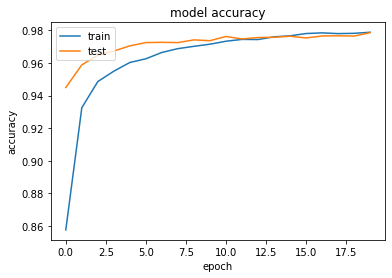

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

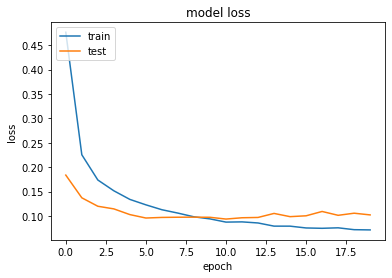

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CNN with Keras:

In [12]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
import matplotlib.pyplot as plt

In [15]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# Parameters
BATCH_SIZE = 1280
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [16]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 4s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [17]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
# Layer 1
model = Sequential() 
model.add(Conv2D(32, kernel_size=3, padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [19]:
# Layer 2
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  after removing the cwd from sys.path.


In [20]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 1223s 31ms/step - loss: 2.2228 - acc: 0.1953 - val_loss: 2.0045 - val_acc: 0.3073
Epoch 2/10
40000/40000 [==============================] - 1237s 31ms/step - loss: 1.9659 - acc: 0.3062 - val_loss: 1.7461 - val_acc: 0.3899
Epoch 3/10
40000/40000 [==============================] - 1225s 31ms/step - loss: 1.7826 - acc: 0.3661 - val_loss: 1.8273 - val_acc: 0.3558
Epoch 4/10
40000/40000 [==============================] - 1239s 31ms/step - loss: 1.6855 - acc: 0.4054 - val_loss: 1.7951 - val_acc: 0.3533
Epoch 5/10
40000/40000 [==============================] - 1228s 31ms/step - loss: 1.5943 - acc: 0.4304 - val_loss: 1.5167 - val_acc: 0.4523
Epoch 6/10
40000/40000 [==============================] - 1226s 31ms/step - loss: 1.5257 - acc: 0.4587 - val_loss: 1.3937 - val_acc: 0.5072
Epoch 7/10
40000/40000 [==============================] - 1227s 31ms/step - loss: 1.4777 - acc: 0.4786 - val_l

# Large Scale Image Processing with Keras:

Introduction

In this kernel, I am going to build three models -

Fine tuning VGG16 pre-trained model to adapt to our dataset.
Using VGG 16 bottleneck features for our dataset.
Fine tuning VGG16 on top of bottleneck features.
In all cases, we will load the VGG model without the final layers because final layers are specific to the high level classification. We want the model's target labels to be same as our dataset classes(daisy, dandelion, rose, sunflower, tulip).

When we are fine-tuning, we want to freeze the weights of initial layers(may be till the last convolutional layer) of the loaded VGG model and add some fully connected layers which will be specific to our dataset with random weights. When we say we are going to freeze the layers, it means that the weight for those layers are not going to be updated while training.Only the weights of the newly added layers will be updated in each epoch.

When we trying to use bottleneck features, we are going to pass our dataset i.e. training and validation set once through the loaded VGG model(note that we are not going to freeze the weights here) and save the output in two arrays respectively called as the bottleneck features for training data and validation data. On top of these bottleneck features, we are going to train a small model which will have target labels specific to our dataset.

When we are going to fine-tune using bottleneck features, the approach is going to be same as fine-tuning except that instead of adding new layers with random weights, we will load the weights of the bottleneck features model into the new layers.
After we are set with the model architecture, we are going to train the model until we find the best set of weights for our datset. Let's get started ! :)

# Credit Card Fraud Detection:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

In [4]:
df=pd.read_csv('data/Credit Card Fraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df=df.fillna(0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140698,83876,1.297031,0.260234,-0.165836,0.304460,0.238056,-0.084983,-0.056115,0.029952,-0.115999,...,-0.315545,-0.948937,-0.024322,-0.883643,0.335230,0.150161,-0.029612,0.008220,0.99,0.0
140699,83876,1.200272,0.259410,0.397862,0.631576,-0.476806,-0.882324,-0.062362,-0.028223,-0.130967,...,-0.231443,-0.739076,0.151545,0.475489,0.134602,0.066882,-0.031207,0.020989,0.89,0.0
140700,83877,-0.939078,1.234767,1.433774,-0.097576,-0.255769,-0.689204,0.509961,0.153369,0.179511,...,-0.257956,-0.582912,0.080816,0.334513,-0.257496,0.094942,0.487942,0.239537,4.49,0.0
140701,83879,1.170286,0.563313,-0.271928,1.394477,-0.038260,-1.000654,0.126524,-0.031662,0.139095,...,-0.038141,-0.086158,-0.033513,0.220516,0.517620,-0.312217,0.041102,0.053760,1.00,0.0


In [8]:
df.Class.value_counts()

0.0    140439
1.0       264
Name: Class, dtype: int64

In [9]:
df.sort_values(by='Class', ascending=False, inplace=True) #easier for stratified sampling
df.drop('Time', axis=1,  inplace = True)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123141,-6.616293,3.563428,-7.058901,4.284346,-5.096299,-1.768618,-4.937554,2.748460,-3.796760,-6.825490,...,1.215976,0.041178,-1.059098,0.275662,0.057425,-0.265838,-0.514637,0.388590,254.76,1.0
42936,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,-12.695947,...,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,59.68,1.0
77682,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,-9.332128,...,-2.457145,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1.00,1.0
10498,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,-0.164563,...,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93,1.0
10497,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79,1.0


Stratified Sampling: balance the ratio of label 0 and 1 datasets:

In [11]:
df_sample = df.iloc[:3000,:]
df_sample.Class.value_counts()

0.0    2736
1.0     264
Name: Class, dtype: int64

In [12]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

Shuffle and split the data into train and test sets:

In [13]:
from sklearn.utils import shuffle
shuffle_df = shuffle(df_sample, random_state=42)
df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [14]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [15]:
train_feature.shape

(2400, 29)

In [16]:
train_label.shape

(2400,)

Standardize the features for speeding up deep learning (MinMaxScaler)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

### Run the deep learning model: using keras MLP:

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 - 0s - loss: 0.6896 - accuracy: 0.6785 - val_loss: 0.6760 - val_accuracy: 0.9146
Epoch 2/200
1/

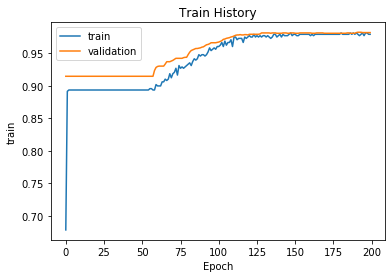

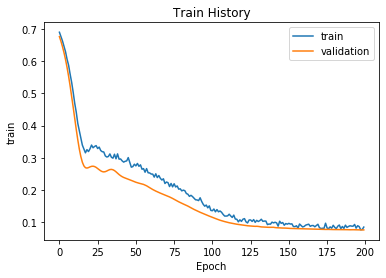

19/19 [==============================] - 0s 5ms/step - loss: 0.0599 - accuracy: 0.9833


accuracy= 0.9833333492279053
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential()

# Layer 1:
model.add(Dense(units=200, input_dim=29,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))

# Layer 2:
model.add(Dense(units=200,  kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_feature_trans, y=train_label, 
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2)

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])
prediction = model.predict_classes(test_feature_trans)

### Model Evaluation:

In [25]:
df_ans = pd.DataFrame({'Real Class' :test_label})
df_ans['Prediction'] = prediction

In [26]:
df_ans[ df_ans['Real Class'] != df_ans['Prediction'] ]

,Real Class,Prediction
21,1.0,0
44,0.0,1
53,1.0,0
67,1.0,0
90,1.0,0
201,1.0,0
316,1.0,0
319,1.0,0
320,1.0,0
383,0.0,1


In [27]:
df_ans['Prediction'].value_counts()

0    557
1     43
Name: Prediction, dtype: int64

In [28]:
df_ans['Real Class'].value_counts()

0.0    551
1.0     49
Name: Real Class, dtype: int64

total test case number:  600


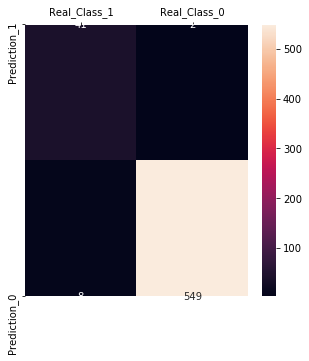

In [29]:
import seaborn as sns
%matplotlib inline

cols = ['Real_Class_1','Real_Class_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B1P0 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 1)])
B0P1 = len(df_ans[(df_ans['Prediction'] != df_ans['Real Class']) & (df_ans['Real Class'] == 0)])
B0P0 = len(df_ans[(df_ans['Prediction'] == df_ans['Real Class']) & (df_ans['Real Class'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [30]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

In [31]:
model_efficacy(conf)

total_num:  600
G1P1:  41
G0P1:  2
G1P0:  8
G0P0:  549
##########################
sensitivity:  0.8367346938775511
specificity:  0.9856373429084381
false_positive_rate:  0.003629764065335753
false_negative_rate:  0.16326530612244897


(600,
 0.8367346938775511,
 0.9856373429084381,
 0.003629764065335753,
 0.16326530612244897)

In [33]:
df_sample2 = df.iloc[:,:] 

feature2 = np.array(df_sample2.values[:,0:29])
label2 = np.array(df_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2) #using the same scaler as above

scores = model.evaluate(feature2_trans, label2)
print('\n')
print('accuracy=',scores[1])

prediction2 = model.predict_classes(feature2_trans)

4397/4397 [==============================] - 25s 6ms/step - loss: 0.0244 - accuracy: 0.9984


accuracy= 0.9983653426170349


In [34]:
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140439
           1       0.54      0.81      0.65       264

   micro avg       1.00      1.00      1.00    140703
   macro avg       0.77      0.90      0.82    140703
weighted avg       1.00      1.00      1.00    140703

[[140259    180]
 [    50    214]]


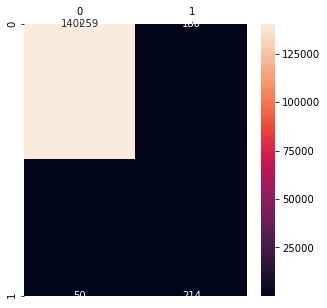

In [37]:
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

In [38]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  140703
G1P1:  140259
G0P1:  180
G1P0:  50
G0P0:  214
##########################
sensitivity:  0.9996436436721807
specificity:  0.8106060606060606
false_positive_rate:  0.45685279187817257
false_negative_rate:  0.0003563563278193131


(140703,
 0.9996436436721807,
 0.8106060606060606,
 0.45685279187817257,
 0.0003563563278193131)